In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

# import pandasql as psql

In [3]:
WeatherData = pd.read_csv(r"E:\pracs\Project-515\weatherAUS1.csv", header=0)

# Copy the file to back-up

WeatherData_bk=WeatherData.copy()

# Display first 5 rows in the dataset

WeatherData

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,29-08-2011,Tuggeranong,2.9,17.3,0.0,NaN,NaN,WNW,35.0,N,WNW,13.0,22.0,56.0,38.0,1018.9,1017.4,NaN,NaN,11.3,15.8,No,No
49995,30-08-2011,Tuggeranong,4.3,16.0,0.0,NaN,NaN,N,28.0,NaN,N,0.0,11.0,76.0,42.0,1024.1,1021.0,NaN,NaN,8.4,15.0,No,No
49996,31-08-2011,Tuggeranong,1.2,17.0,0.0,NaN,NaN,NE,28.0,WNW,N,4.0,15.0,73.0,49.0,1025.3,1021.8,NaN,NaN,8.1,16.3,No,No
49997,01-09-2011,Tuggeranong,3.9,18.7,0.0,NaN,NaN,ESE,24.0,NW,ESE,4.0,11.0,69.0,31.0,1025.0,1022.0,NaN,NaN,10.9,18.4,No,No


In [4]:
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           49999 non-null  object 
 1   Location       49999 non-null  object 
 2   MinTemp        49475 non-null  float64
 3   MaxTemp        49611 non-null  float64
 4   Rainfall       48721 non-null  float64
 5   Evaporation    24047 non-null  float64
 6   Sunshine       18441 non-null  float64
 7   WindGustDir    44491 non-null  object 
 8   WindGustSpeed  44498 non-null  float64
 9   WindDir9am     44433 non-null  object 
 10  WindDir3pm     47570 non-null  object 
 11  WindSpeed9am   48871 non-null  float64
 12  WindSpeed3pm   48244 non-null  float64
 13  Humidity9am    49218 non-null  float64
 14  Humidity3pm    48605 non-null  float64
 15  Pressure9am    43008 non-null  float64
 16  Pressure3pm    43054 non-null  float64
 17  Cloud9am       29614 non-null  float64
 18  Cloud3

In [5]:
WeatherData.isnull().sum()

Date                 0
Location             0
MinTemp            524
MaxTemp            388
Rainfall          1278
Evaporation      25952
Sunshine         31558
WindGustDir       5508
WindGustSpeed     5501
WindDir9am        5566
WindDir3pm        2429
WindSpeed9am      1128
WindSpeed3pm      1755
Humidity9am        781
Humidity3pm       1394
Pressure9am       6991
Pressure3pm       6945
Cloud9am         20385
Cloud3pm         20823
Temp9am            500
Temp3pm           1155
RainToday         1278
RainTomorrow      1277
dtype: int64

In [6]:
WeatherData = WeatherData[WeatherData['RainTomorrow'].notna() & WeatherData['RainToday'].notna()]

In [7]:
WeatherData.isnull().sum()

Date                 0
Location             0
MinTemp            301
MaxTemp            183
Rainfall             0
Evaporation      24413
Sunshine         29714
WindGustDir       4993
WindGustSpeed     4987
WindDir9am        5088
WindDir3pm        2160
WindSpeed9am       757
WindSpeed3pm      1501
Humidity9am        475
Humidity3pm       1173
Pressure9am       6572
Pressure3pm       6579
Cloud9am         19255
Cloud3pm         19732
Temp9am            211
Temp3pm            949
RainToday            0
RainTomorrow         0
dtype: int64

In [8]:
WeatherData = WeatherData.drop(['Date'],axis=1)

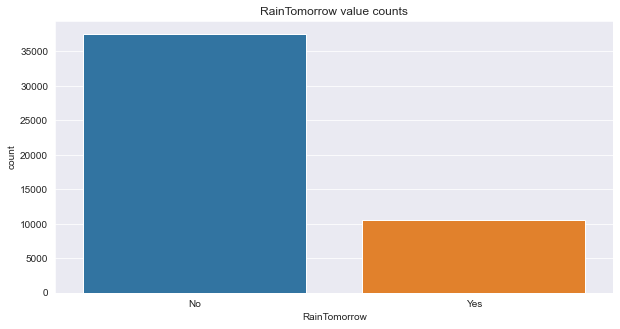

In [9]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=WeatherData["RainTomorrow"]);

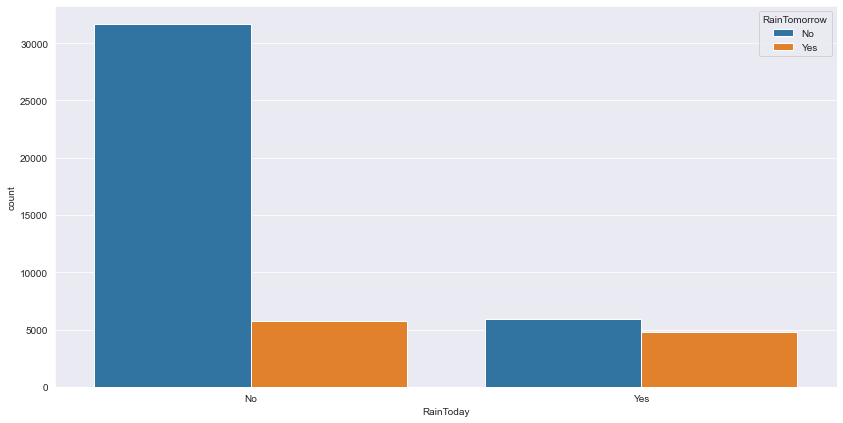

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(x=WeatherData["RainToday"], hue=WeatherData["RainTomorrow"])
plt.show()

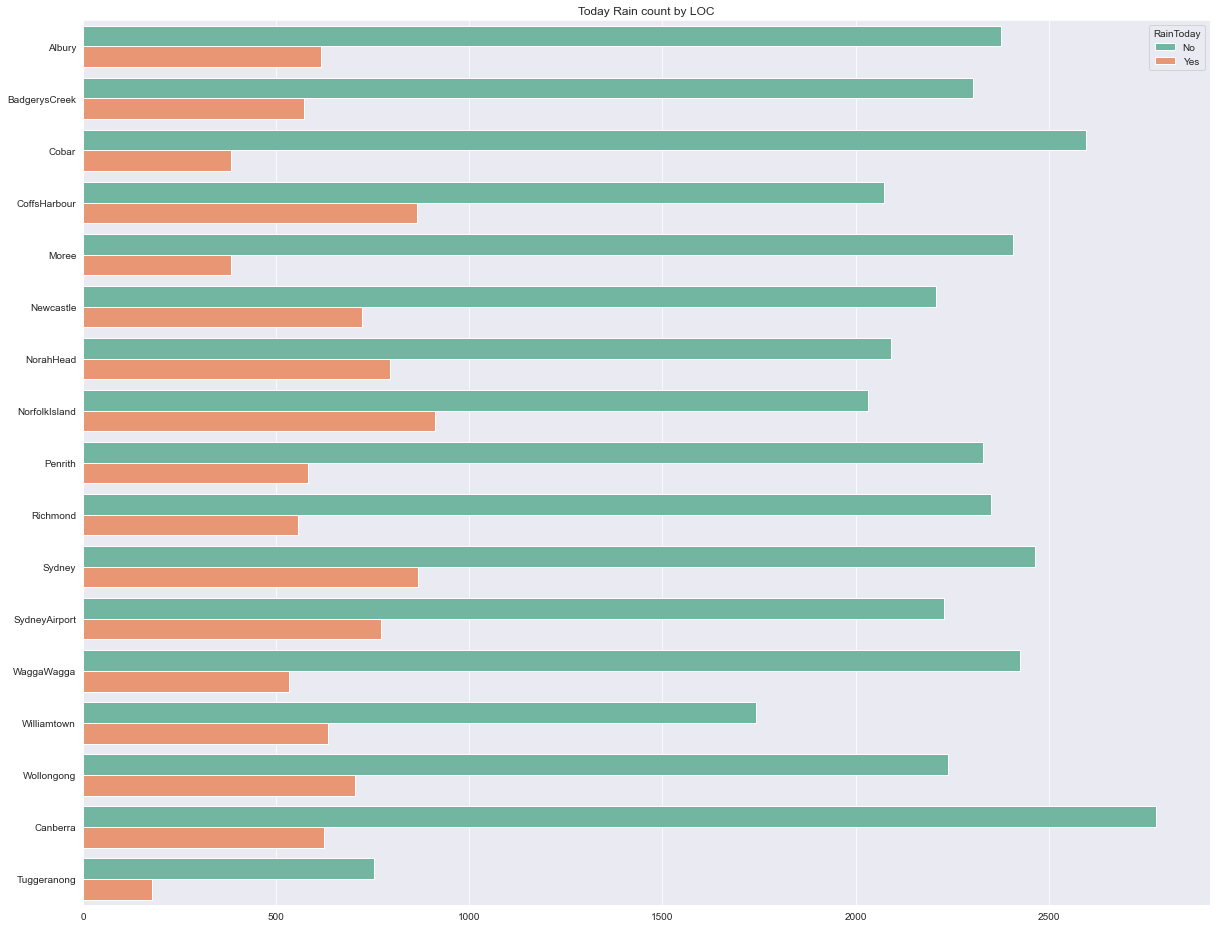

In [10]:
plt.figure(figsize=(17,13))
sns.countplot(data=WeatherData, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))
plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

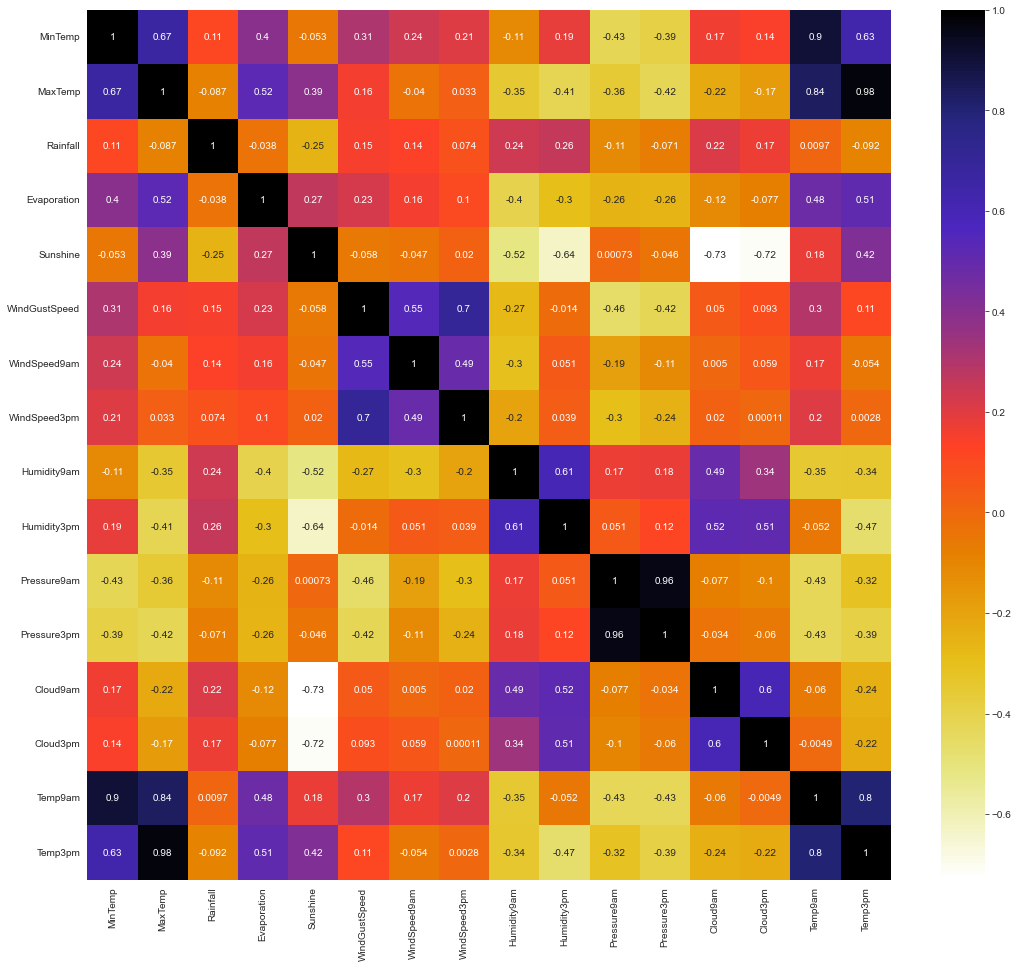

In [11]:
plt.figure(figsize=(18,16))
sns.heatmap(WeatherData.corr(), annot=True, cmap=plt.cm.CMRmap_r);

In [8]:
WeatherData.sample(50)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
31314,Sydney,17.5,24.5,0.8,4.0,3.4,W,28.0,WNW,SE,13.0,15.0,82.0,62.0,1021.4,1018.2,NaN,NaN,21.0,24.5,No,No
29190,Richmond,11.6,18.8,12.4,NaN,NaN,SW,50.0,SW,SSW,6.0,9.0,48.0,40.0,1009.4,1008.8,4.0,8.0,15.2,18.3,Yes,Yes
10138,CoffsHarbour,18.5,25.8,11.6,2.0,8.4,ESE,48.0,ESE,SE,24.0,28.0,58.0,63.0,1020.4,1019.6,5.0,5.0,24.2,23.9,Yes,Yes
16776,Newcastle,10.0,22.8,0.0,NaN,NaN,NaN,NaN,SW,SE,4.0,9.0,31.0,36.0,NaN,NaN,0.0,1.0,17.5,22.0,No,No
49038,Tuggeranong,7.5,24.6,0.0,NaN,NaN,NW,39.0,NW,WNW,9.0,19.0,55.0,34.0,1011.2,1008.6,NaN,NaN,14.9,24.5,No,No
45322,Wollongong,13.3,22.6,0.0,NaN,NaN,WSW,93.0,N,WNW,6.0,28.0,39.0,29.0,1006.6,1002.4,2.0,NaN,16.4,22.0,No,No
34097,SydneyAirport,9.7,21.5,0.0,3.8,10.3,NW,78.0,N,NNW,19.0,26.0,51.0,32.0,1019.6,1013.0,1.0,1.0,13.9,21.1,No,No
25356,Penrith,6.2,18.2,0.0,NaN,NaN,W,50.0,W,WSW,17.0,26.0,46.0,41.0,NaN,NaN,NaN,NaN,14.3,16.7,No,No
36907,WaggaWagga,14.9,33.8,0.0,10.6,12.6,NE,33.0,E,SW,13.0,9.0,59.0,26.0,1015.1,1012.2,2.0,1.0,22.4,32.0,No,No
35976,SydneyAirport,22.3,27.0,0.0,14.0,3.6,S,54.0,SE,S,17.0,43.0,56.0,92.0,1014.8,1017.2,6.0,8.0,26.4,20.7,No,Yes


In [9]:
Target_count = WeatherData.RainTomorrow.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(WeatherData))

Class 0: 37541
Class 1: 10559
Proportion: 3.56 : 1
Total loans Trans: 48100


In [10]:
WeatherData.isnull().sum()

Location             0
MinTemp            301
MaxTemp            183
Rainfall             0
Evaporation      24413
Sunshine         29714
WindGustDir       4993
WindGustSpeed     4987
WindDir9am        5088
WindDir3pm        2160
WindSpeed9am       757
WindSpeed3pm      1501
Humidity9am        475
Humidity3pm       1173
Pressure9am       6572
Pressure3pm       6579
Cloud9am         19255
Cloud3pm         19732
Temp9am            211
Temp3pm            949
RainToday            0
RainTomorrow         0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer_str=SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=None,verbose=0,copy=True,add_indicator=False)
WeatherData['WindGustDir']=imputer_str.fit_transform(WeatherData[['WindGustDir']])
WeatherData['WindGustSpeed']=imputer_str.fit_transform(WeatherData[['WindGustSpeed']])
WeatherData['WindDir9am']=imputer_str.fit_transform(WeatherData[['WindDir9am']])
WeatherData['Evaporation']=imputer_str.fit_transform(WeatherData[['Evaporation']])
WeatherData['MaxTemp']=imputer_str.fit_transform(WeatherData[['MaxTemp']])
WeatherData['MinTemp']=imputer_str.fit_transform(WeatherData[['MinTemp']])
WeatherData['WindSpeed3pm']=imputer_str.fit_transform(WeatherData[['WindSpeed3pm']])
WeatherData['Humidity9am']=imputer_str.fit_transform(WeatherData[['Humidity9am']])
WeatherData['Humidity3pm']=imputer_str.fit_transform(WeatherData[['Humidity3pm']])
WeatherData['Pressure9am']=imputer_str.fit_transform(WeatherData[['Pressure9am']])
WeatherData['Pressure3pm']=imputer_str.fit_transform(WeatherData[['Pressure3pm']])
WeatherData['Cloud9am']=imputer_str.fit_transform(WeatherData[['Cloud9am']])
WeatherData['Cloud3pm']=imputer_str.fit_transform(WeatherData[['Cloud3pm']])
WeatherData['Temp9am']=imputer_str.fit_transform(WeatherData[['Temp9am']])
WeatherData['Temp3pm']=imputer_str.fit_transform(WeatherData[['Temp3pm']])
WeatherData['WindDir3pm']=imputer_str.fit_transform(WeatherData[['WindDir3pm']])
WeatherData['WindSpeed9am']=imputer_str.fit_transform(WeatherData[['WindSpeed9am']])
WeatherData['Sunshine']=imputer_str.fit_transform(WeatherData[['Sunshine']])

In [12]:
WeatherData.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
WeatherData['WindGustSpeed']=WeatherData['WindGustSpeed'].astype(int)
WeatherData['WindSpeed9am']=WeatherData['WindSpeed9am'].astype(int)
WeatherData['WindSpeed3pm']=WeatherData['WindSpeed3pm'].astype(int)
WeatherData['Humidity9am']=WeatherData['Humidity9am'].astype(int)
WeatherData['Humidity3pm']=WeatherData['Humidity3pm'].astype(int)
WeatherData['Cloud9am']=WeatherData['Cloud9am'].astype(int)
WeatherData['Cloud3pm']=WeatherData['Cloud3pm'].astype(int)
WeatherData.sample(30)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
38398,WaggaWagga,7.3,20.3,0.0,1.8,9.3,E,28,E,E,15,9,71,48,1030.4,1026.8,2,1,13.3,20.0,No,No
44645,Wollongong,16.1,19.2,23.0,4.0,0.0,ENE,57,SSE,S,22,20,90,82,1022.8,1023.0,8,8,16.8,18.3,Yes,Yes
4317,BadgerysCreek,2.4,15.2,0.0,4.0,0.0,SW,37,SW,S,22,11,65,46,1026.5,1023.2,1,1,10.3,13.4,No,No
25816,Penrith,12.8,21.9,0.0,4.0,0.0,W,46,SW,SE,22,15,39,30,1017.9,1015.6,1,1,15.8,20.5,No,No
21063,NorahHead,14.5,23.7,0.2,4.0,0.0,N,33,NNW,N,9,22,81,49,1019.5,1015.3,1,1,18.6,22.7,No,No
44382,Wollongong,19.9,25.4,0.6,4.0,0.0,ENE,31,NNW,E,7,17,78,69,1023.7,1021.3,3,1,21.4,24.8,No,No
2724,Albury,4.7,16.6,0.2,4.0,0.0,W,22,E,W,6,11,81,56,1029.6,1028.1,1,1,10.0,16.0,No,No
33292,Sydney,16.9,24.6,10.2,2.8,10.7,E,28,W,E,7,19,71,62,1009.4,1007.0,6,2,20.0,23.4,Yes,No
17672,Newcastle,18.0,25.0,0.0,4.0,0.0,NE,35,NW,NE,0,13,81,52,1017.9,1015.6,8,1,20.5,18.4,No,No
641,Albury,7.1,17.6,0.0,4.0,0.0,SE,26,SSE,E,17,17,65,55,1022.1,1017.5,1,1,10.2,17.2,No,Yes


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
WeatherData['WindGustDir']=le.fit_transform(WeatherData[['WindGustDir']])
WeatherData['Location']=le.fit_transform(WeatherData[['Location']])
WeatherData['WindDir9am']=le.fit_transform(WeatherData[['WindDir9am']])
WeatherData['WindDir3pm']=le.fit_transform(WeatherData[['WindDir3pm']])
WeatherData

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,4.0,0.0,13,44,13,14,20,24,71,22,1007.7,1007.1,8,1,16.9,21.8,No,No
1,0,7.4,25.1,0.0,4.0,0.0,14,44,6,15,4,22,44,25,1010.6,1007.8,1,1,17.2,24.3,No,No
2,0,12.9,25.7,0.0,4.0,0.0,15,46,13,15,19,26,38,30,1007.6,1008.7,1,2,21.0,23.2,No,No
3,0,9.2,28.0,0.0,4.0,0.0,4,24,9,0,11,9,45,16,1017.6,1012.8,1,1,18.1,26.5,No,No
4,0,17.5,32.3,1.0,4.0,0.0,13,41,1,7,7,20,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,13,2.9,17.3,0.0,4.0,0.0,14,35,3,14,13,22,56,38,1018.9,1017.4,1,1,11.3,15.8,No,No
49995,13,4.3,16.0,0.0,4.0,0.0,3,28,7,3,0,11,76,42,1024.1,1021.0,1,1,8.4,15.0,No,No
49996,13,1.2,17.0,0.0,4.0,0.0,4,28,14,3,4,15,73,49,1025.3,1021.8,1,1,8.1,16.3,No,No
49997,13,3.9,18.7,0.0,4.0,0.0,2,24,7,2,4,11,69,31,1025.0,1022.0,1,1,10.9,18.4,No,No


In [15]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
WeatherData['RainToday']=lb.fit_transform(WeatherData['RainToday'])
WeatherData['RainTomorrow']=lb.fit_transform(WeatherData['RainTomorrow'])
WeatherData

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,4.0,0.0,13,44,13,14,20,24,71,22,1007.7,1007.1,8,1,16.9,21.8,0,0
1,0,7.4,25.1,0.0,4.0,0.0,14,44,6,15,4,22,44,25,1010.6,1007.8,1,1,17.2,24.3,0,0
2,0,12.9,25.7,0.0,4.0,0.0,15,46,13,15,19,26,38,30,1007.6,1008.7,1,2,21.0,23.2,0,0
3,0,9.2,28.0,0.0,4.0,0.0,4,24,9,0,11,9,45,16,1017.6,1012.8,1,1,18.1,26.5,0,0
4,0,17.5,32.3,1.0,4.0,0.0,13,41,1,7,7,20,82,33,1010.8,1006.0,7,8,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,13,2.9,17.3,0.0,4.0,0.0,14,35,3,14,13,22,56,38,1018.9,1017.4,1,1,11.3,15.8,0,0
49995,13,4.3,16.0,0.0,4.0,0.0,3,28,7,3,0,11,76,42,1024.1,1021.0,1,1,8.4,15.0,0,0
49996,13,1.2,17.0,0.0,4.0,0.0,4,28,14,3,4,15,73,49,1025.3,1021.8,1,1,8.1,16.3,0,0
49997,13,3.9,18.7,0.0,4.0,0.0,2,24,7,2,4,11,69,31,1025.0,1022.0,1,1,10.9,18.4,0,0


In [16]:
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48100 entries, 0 to 49998
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       48100 non-null  int32  
 1   MinTemp        48100 non-null  float64
 2   MaxTemp        48100 non-null  float64
 3   Rainfall       48100 non-null  float64
 4   Evaporation    48100 non-null  float64
 5   Sunshine       48100 non-null  float64
 6   WindGustDir    48100 non-null  int32  
 7   WindGustSpeed  48100 non-null  int32  
 8   WindDir9am     48100 non-null  int32  
 9   WindDir3pm     48100 non-null  int32  
 10  WindSpeed9am   48100 non-null  int32  
 11  WindSpeed3pm   48100 non-null  int32  
 12  Humidity9am    48100 non-null  int32  
 13  Humidity3pm    48100 non-null  int32  
 14  Pressure9am    48100 non-null  float64
 15  Pressure3pm    48100 non-null  float64
 16  Cloud9am       48100 non-null  int32  
 17  Cloud3pm       48100 non-null  int32  
 18  Temp9a

In [17]:
Indepvar=[]
for col in WeatherData.columns:
    if col != 'RainTomorrow':
        Indepvar.append(col)
Targetvar='RainTomorrow'
x=WeatherData[Indepvar]
y=WeatherData[Targetvar]

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33670, 21), (14430, 21), (33670,), (14430,))

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
WDResults = pd.read_csv(r"C:\Users\pramo\OneDrive\Desktop\AIML\HTResults.csv", header=0)
WDResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 1487  1704]
 [  626 10613]]
Outcome values : 
 1487 1704 626 10613
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.47      0.56      3191
           0       0.86      0.94      0.90     11239

    accuracy                           0.84     14430
   macro avg       0.78      0.71      0.73     14430
weighted avg       0.83      0.84      0.83     14430

Accuracy : 83.9 %
Precision : 70.4 %
Recall : 46.6 %
F1 Score : 0.561
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 70.5 %
MCC : 0.482
roc_auc_score: 0.705


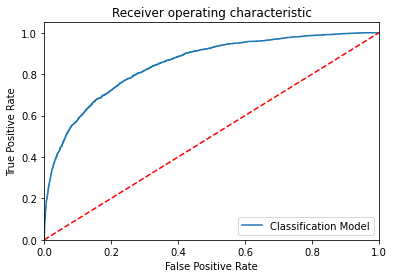

Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1602 1589]
 [1616 9623]]
Outcome values : 
 1602 1589 1616 9623
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.50      0.50      3191
           0       0.86      0.86      0.86     11239

    accuracy                           0.78     14430
   macro avg       0.68      0.68      0.68     14430
weighted avg       0.78      0.78      0.78     14430

Accuracy : 77.8 %
Precision : 49.8 %
Recall : 50.2 %
F1 Score : 0.5
Specificity or True Negative Rate : 85.6 %
Balanced Accuracy : 67.9 %
MCC : 0.357
roc_auc_score: 0.679


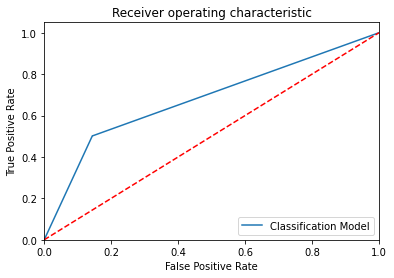

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1468  1723]
 [  448 10791]]
Outcome values : 
 1468 1723 448 10791
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.46      0.57      3191
           0       0.86      0.96      0.91     11239

    accuracy                           0.85     14430
   macro avg       0.81      0.71      0.74     14430
weighted avg       0.84      0.85      0.83     14430

Accuracy : 85.0 %
Precision : 76.6 %
Recall : 46.0 %
F1 Score : 0.575
Specificity or True Negative Rate : 96.0 %
Balanced Accuracy : 71.0 %
MCC : 0.514
roc_auc_score: 0.71


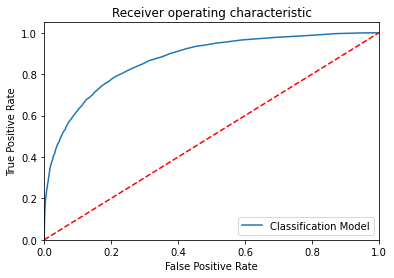

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1426  1765]
 [  431 10808]]
Outcome values : 
 1426 1765 431 10808
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.45      0.56      3191
           0       0.86      0.96      0.91     11239

    accuracy                           0.85     14430
   macro avg       0.81      0.70      0.74     14430
weighted avg       0.84      0.85      0.83     14430

Accuracy : 84.8 %
Precision : 76.8 %
Recall : 44.7 %
F1 Score : 0.565
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 70.4 %
MCC : 0.506
roc_auc_score: 0.704


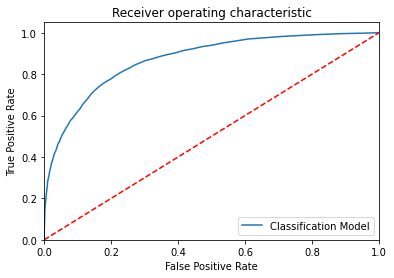

Model Name:  GaussianNB()
Confusion matrix : 
 [[1871 1320]
 [1496 9743]]
Outcome values : 
 1871 1320 1496 9743
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.59      0.57      3191
           0       0.88      0.87      0.87     11239

    accuracy                           0.80     14430
   macro avg       0.72      0.73      0.72     14430
weighted avg       0.81      0.80      0.81     14430

Accuracy : 80.5 %
Precision : 55.6 %
Recall : 58.6 %
F1 Score : 0.571
Specificity or True Negative Rate : 86.7 %
Balanced Accuracy : 72.6 %
MCC : 0.445
roc_auc_score: 0.727


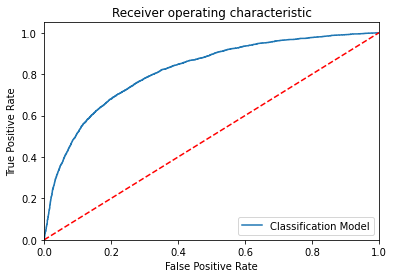

Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1489  1702]
 [  712 10527]]
Outcome values : 
 1489 1702 712 10527
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.47      0.55      3191
           0       0.86      0.94      0.90     11239

    accuracy                           0.83     14430
   macro avg       0.77      0.70      0.72     14430
weighted avg       0.82      0.83      0.82     14430

Accuracy : 83.3 %
Precision : 67.7 %
Recall : 46.7 %
F1 Score : 0.552
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 70.2 %
MCC : 0.466
roc_auc_score: 0.702


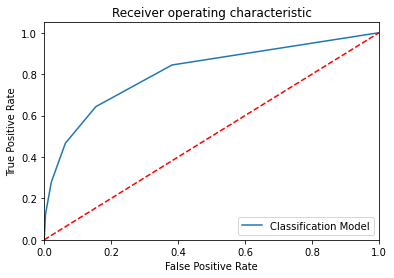

Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[ 1397  1794]
 [  490 10749]]
Outcome values : 
 1397 1794 490 10749
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.44      0.55      3191
           0       0.86      0.96      0.90     11239

    accuracy                           0.84     14430
   macro avg       0.80      0.70      0.73     14430
weighted avg       0.83      0.84      0.83     14430

Accuracy : 84.2 %
Precision : 74.0 %
Recall : 43.8 %
F1 Score : 0.55
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 69.7 %
MCC : 0.485
roc_auc_score: 0.697


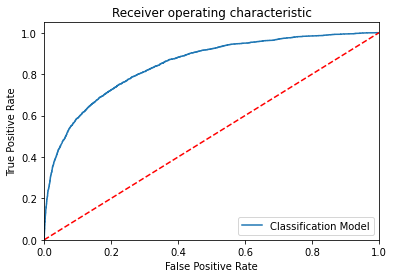

Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[ 1198  1993]
 [  306 10933]]
Outcome values : 
 1198 1993 306 10933
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.38      0.51      3191
           0       0.85      0.97      0.90     11239

    accuracy                           0.84     14430
   macro avg       0.82      0.67      0.71     14430
weighted avg       0.83      0.84      0.82     14430

Accuracy : 84.1 %
Precision : 79.7 %
Recall : 37.5 %
F1 Score : 0.51
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 67.4 %
MCC : 0.473
roc_auc_score: 0.674


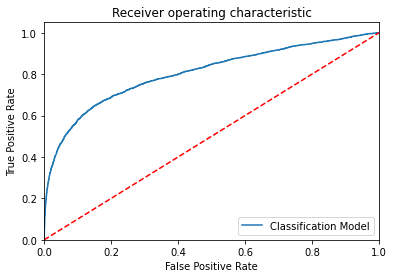

Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[2423  768]
 [2071 9168]]
Outcome values : 
 2423 768 2071 9168
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.76      0.63      3191
           0       0.92      0.82      0.87     11239

    accuracy                           0.80     14430
   macro avg       0.73      0.79      0.75     14430
weighted avg       0.84      0.80      0.81     14430

Accuracy : 80.3 %
Precision : 53.9 %
Recall : 75.9 %
F1 Score : 0.631
Specificity or True Negative Rate : 81.6 %
Balanced Accuracy : 78.8 %
MCC : 0.515
roc_auc_score: 0.788


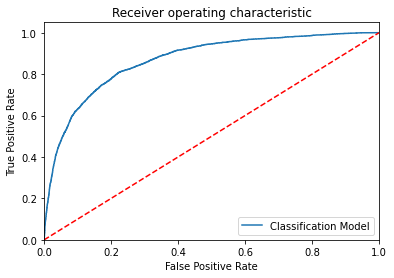

Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 1619  1572]
 [  523 10716]]
Outcome values : 
 1619 1572 523 10716
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.51      0.61      3191
           0       0.87      0.95      0.91     11239

    accuracy                           0.85     14430
   macro avg       0.81      0.73      0.76     14430
weighted avg       0.85      0.85      0.84     14430

Accuracy : 85.5 %
Precision : 75.6 %
Recall : 50.7 %
F1 Score : 0.607
Specificity or True Negative Rate : 95.3 %
Balanced Accuracy : 73.0 %
MCC : 0.538
roc_auc_score: 0.73


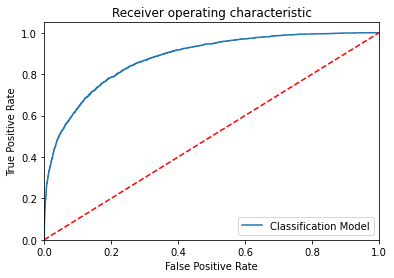

Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[ 1554  1637]
 [  515 10724]]
Outcome values : 
 1554 1637 515 10724
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.49      0.59      3191
           0       0.87      0.95      0.9

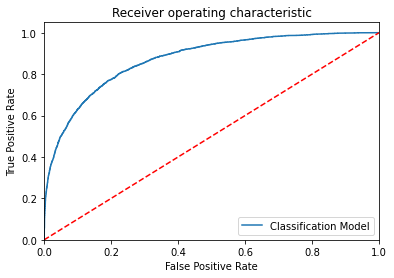

In [21]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier


# Build the model

ModelLGB = lgb.LGBMClassifier()




# Create objects of classification algorithm with default hyper-parameters

ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET=ExtraTreesClassifier()
ModelGNB = GaussianNB(priors=None, var_smoothing=1e-09)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)
ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF,ModelET,ModelGNB,ModelKNN,ModelSVM,ModelSVMPoly,ModelSVMGaussian,ModelLGB,ModelXGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
   
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    WDResults = WDResults.append(new_row, ignore_index=True)

In [22]:
WDResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1487,1704,626,10613,0.839,0.704,0.466,0.561,0.944,0.482,0.70515,0.705
1,DecisionTreeClassifier(),1602,1589,1616,9623,0.778,0.498,0.502,0.5,0.856,0.357,0.679126,0.679
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1468,1723,448,10791,0.85,0.766,0.46,0.575,0.96,0.514,0.710091,0.71
3,"(ExtraTreeClassifier(random_state=753370279), ...",1426,1765,431,10808,0.848,0.768,0.447,0.565,0.962,0.506,0.704267,0.704
4,GaussianNB(),1871,1320,1496,9743,0.805,0.556,0.586,0.571,0.867,0.445,0.726614,0.726
5,KNeighborsClassifier(),1489,1702,712,10527,0.833,0.677,0.467,0.552,0.937,0.466,0.701637,0.702
6,"SVC(kernel='linear', probability=True)",1397,1794,490,10749,0.842,0.74,0.438,0.55,0.956,0.485,0.697098,0.697
7,"SVC(degree=2, kernel='poly', probability=True)",1198,1993,306,10933,0.841,0.797,0.375,0.51,0.973,0.473,0.674102,0.674
8,"SVC(class_weight='balanced', probability=True,...",2423,768,2071,9168,0.803,0.539,0.759,0.631,0.816,0.515,0.787527,0.788
9,LGBMClassifier(),1619,1572,523,10716,0.855,0.756,0.507,0.607,0.953,0.538,0.730415,0.73
